# Testing


Enter Your Choice: 
1. Emotions
2. Gestures

1


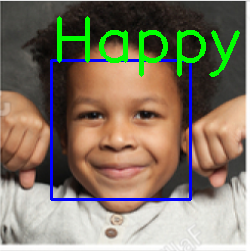

In [ ]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np 
from google.colab.patches import cv2_imshow
import cv2
# from playsound import playsound
import time

# Load the respective emotions and gesture Models

emotion_model = load_model("/content/drive/MyDrive/pre-trained models/emotions.h5")
gesture_model = load_model("/content/drive/MyDrive/pre-trained models/gesture.h5")

# Load the Haar Cascade classifier for face detection

face_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')

# Sort the emotions and gesture labels

emotion_label = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
gesture_label = ['loser', 'punch', 'super', 'victory']

# Analyze users choice 
# 1 for emotions detector
# 2 for gestures detector

print("""
Enter Your Choice: 
1. Emotions
2. Gestures
""")

choice = int(input())
i=0
if choice==1 :


    # cap = cv2.VideoCapture("/content/drive/MyDrive/test/videotest.mp4")
    #cap = cv2.VideoCapture(0)
    while i<1:
        # Grab a single frame of video
        # ret, frame = cap.read()
        frame = cv2.imread("/content/drive/MyDrive/test/facetest2 (1).png")
        labels = []
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray,1.3,5)

        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h,x:x+w]
            roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        # rect,face,image = face_detector(frame)

            if np.sum([roi_gray])!=0:
                roi = roi_gray.astype('float')/255.0
                roi = img_to_array(roi)
                roi = np.expand_dims(roi,axis=0)

            # make a prediction on the ROI, then lookup the class

                preds = emotion_model.predict(roi)[0]
                i=i+1
                label = emotion_label[preds.argmax()]

                label_position = (x,y)
                cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)

            else:
                cv2.putText(frame, 'No Face Found', (20,60), cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)

        cv2_imshow(frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

else:

 
    # cap = cv2.VideoCapture(0)
    
    while True:

        # ret, frame = cap.read()
        frame = cv2.imread("/content/drive/MyDrive/test/g7.png")
        roi = frame[100:500, 100:500]
        img = cv2.resize(roi, (200, 200))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = img.astype('float32')/255
        pred = np.argmax(gesture_model.predict(img))
        color = (0,0,255)

 
        cv2.putText(frame, gesture_label[pred], (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, color, 2)
        cv2_imshow('Gesture Detector', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
import os
import cv2
import time
import numpy as np 
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array


# Load the respective emotions and gesture Models

emotion_model = load_model("/content/drive/MyDrive/pre-trained models/emotions.h5")
gesture_model = load_model("/content/drive/MyDrive/pre-trained models/gestu.h5")

# Load the Haar Cascade classifier for face detection

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Sort the emotions and gesture labels

emotion_label = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
gesture_label = ['Love', 'Power', 'Ok', 'Victory']

# Analyze users choice 
# 1 for emotions detector
# 2 for gestures detector

print("""
Enter Your Choice: 
1. Emotions
2. Gestures
""")

choice = int(input())

if choice == 1:

    # cap = cv2.VideoCapture("/content/drive/MyDrive/test/videotest.mp4")
    #cap = cv2.VideoCapture(0)
    while True:
        # Grab a single frame of video
        # ret, frame = cap.read()
        frame = cv2.imread("/content/drive/MyDrive/test/g7.png")
        labels = []
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray,1.3,5)

        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h,x:x+w]
            roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        # rect,face,image = face_detector(frame)

            if np.sum([roi_gray])!=0:
                roi = roi_gray.astype('float')/255.0
                roi = img_to_array(roi)
                roi = np.expand_dims(roi,axis=0)

            # make a prediction on the ROI, then lookup the class

                preds = emotion_model.predict(roi)[0]
                label = emotion_label[preds.argmax()]

            # We are starting the clock here and after every 10 seconds 
            # we will give a voice prediction.

                start = time.clock()
                print(start)

                label_position = (x,y)
                cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)

            else:
                cv2.putText(frame, 'No Face Found', (20,60), cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)

        cv2_imshow(frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


else:

   # cap = cv2.VideoCapture('/content/drive/MyDrive/test/test1.mp4')
    
    while True:

        #ret, frame = cap.read()
        frame = cv2.imread("/content/drive/MyDrive/test/g7.png")
        roi = frame[0:, 0:]
        img = cv2.resize(roi, (200, 200))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = img.astype('float32')/255
        pred = np.argmax(gesture_model.predict(img))
        color = (0,0,255)

        start = time.clock()
        print(start)

        cv2.putText(frame, gesture_label[pred], (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, color, 2)
        cv2_imshow(frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


Enter Your Choice: 
1. Emotions
2. Gestures

1


error: ignored

## New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
